Installing all the dependencies

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

sns.set_style(style = "darkgrid")
matplotlib.rcParams["figure.figsize"] = (10, 6)
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.facecolor"] = "#00000000"

In [2]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python\\04. ML project Approach'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\rahul\\Desktop\\Project\\Machine-Learning-using-Python'

### Step - 1: Understanding the Business Requirements and Nature of the Data

Most Machine Learning models are trained to serve a real-world use case. It's important to understand the business requirements, modelling objective and the nature of the data available before you start building a machine learning model.

##### Understand the Big Picture

The first step in any machine learning problem is to read the given documentation, talk to various stakeholders ad identify following.
1. What is the business problem you're trying to solve using machine learning?
2. Why are we interested in solving this problem? What impcat will it have on the business?
3. How is this problem solved currently, without any machine learning model?
4. Who will use this the results of this model, and how does it fit into other business processess?
5. How much historical data do we have and how it is collected?
6. What features does the historical data contain? Does it contain the historical data that we are trying to predict?
7. What are some known issues with the data (data entry errors, missing data, differences in units, etc.)?
8. Can we look at some samples rows deom the data? How representative are they of the entrire data?
9. Where is the data is stored and how will you get access to it?

### Step - 2: Classify the problem as Supervised/unsupervised and regression/classification

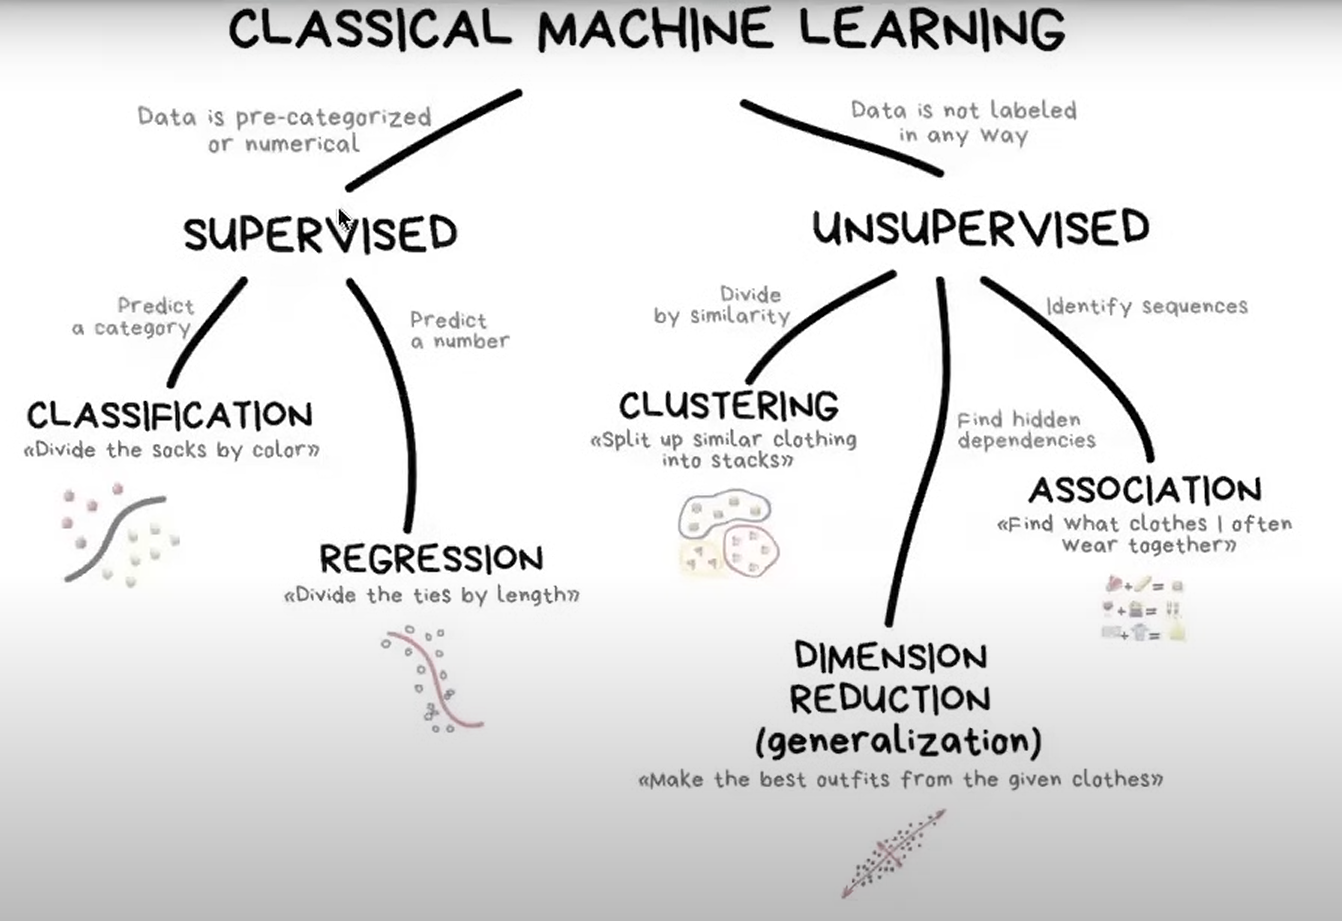

##### Loss functions and Evaluation Metrics

Once you have identified the type of preoblem you're solving, you need to pick an appropriate evaluation metric. Also, on the type of model you train, your model will also use loss function to optimize during the training process.

- **Evaluation Metrics:** They're used by humans to evaluate ML model.
- **Loss Functions:** They're used by computers to evaluate ML model.

### Step - 3: Download, clean and Explore the data and create new features

##### Downloading the data

There may be sources to get the data:
- CSV files
- SQL databases
- Raw File URL's
- Kaggle datasets
- Google drive
- Dropbox

In [5]:
od.download("https://www.kaggle.com/c/rossmann-store-sales", data_dir = "Dataset/")

Skipping, found downloaded files in "Dataset/rossmann-store-sales" (use force=True to force download)


In [6]:
os.listdir("Dataset/rossmann-store-sales/")

['sample_submission.csv', 'store.csv', 'test.csv', 'train.csv']

In [7]:
ross_df = pd.read_csv("Dataset/rossmann-store-sales/train.csv", low_memory = False)

In [8]:
ross_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

In [9]:
store_df = pd.read_csv("Dataset/rossmann-store-sales/store.csv", low_memory = False)

In [10]:
store_df.head()

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

In [11]:
merged_df = ross_df.merge(store_df, how = "left", on = "Store")
merged_df.head()

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         a          a                570.0   
2              1         a          a              14130.0   
3              1         c          c                620.0   
4              1         a          a              29910.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                       11.0                    2007.0       1   
2                       12.0                    2006.0       1   
3                        9.0                    2009.0       0   
4                        4.0                    2015.0       0   

   Promo2SinceWeek  Promo2SinceYear    PromoInterval  
0              NaN              NaN              NaN  
1             13.0           2010.0  Jan,Apr,Jul,Oct  
2             14.0           2011.0  Jan,Apr,Jul,Oct  
3              NaN              NaN              NaN  
4              NaN              NaN              NaN

In [12]:
merged_df.shape

(1017209, 18)

In [13]:
test_df = pd.read_csv("Dataset/rossmann-store-sales/test.csv", low_memory = False)

In [14]:
test_df.head()

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0

In [18]:
merged_test_df = test_df.merge(store_df, how = "left", on = "Store")

In [19]:
merged_test_df.head()

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday  \
0   1      1          4  2015-09-17   1.0      1            0              0   
1   2      3          4  2015-09-17   1.0      1            0              0   
2   3      7          4  2015-09-17   1.0      1            0              0   
3   4      8          4  2015-09-17   1.0      1            0              0   
4   5      9          4  2015-09-17   1.0      1            0              0   

  StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0         c          a               1270.0                        9.0   
1         a          a              14130.0                       12.0   
2         a          c              24000.0                        4.0   
3         a          a               7520.0                       10.0   
4         a          c               2030.0                        8.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2006.0       1             14.0           2011.0   
2                    2013.0       0              NaN              NaN   
3                    2014.0       0              NaN              NaN   
4                    2000.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2              NaN  
3              NaN  
4              NaN

In [20]:
merged_test_df.shape

(41088, 17)

In [21]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [23]:
round(merged_df.describe().T, 2)

count     mean      std     min     25%  \
Store                      1017209.0   558.43   321.91     1.0   280.0   
DayOfWeek                  1017209.0     4.00     2.00     1.0     2.0   
Sales                      1017209.0  5773.82  3849.93     0.0  3727.0   
Customers                  1017209.0   633.15   464.41     0.0   405.0   
Open                       1017209.0     0.83     0.38     0.0     1.0   
Promo                      1017209.0     0.38     0.49     0.0     0.0   
SchoolHoliday              1017209.0     0.18     0.38     0.0     0.0   
CompetitionDistance        1014567.0  5430.09  7715.32    20.0   710.0   
CompetitionOpenSinceMonth   693861.0     7.22     3.21     1.0     4.0   
CompetitionOpenSinceYear    693861.0  2008.69     5.99  1900.0  2006.0   
Promo2                     1017209.0     0.50     0.50     0.0     0.0   
Promo2SinceWeek             509178.0    23.27    14.10     1.0    13.0   
Promo2SinceYear             509178.0  2011.75     1.66  2009.0  2011.0   

                              50%     75%      max  
Store                       558.0   838.0   1115.0  
DayOfWeek                     4.0     6.0      7.0  
Sales                      5744.0  7856.0  41551.0  
Customers                   609.0   837.0   7388.0  
Open                          1.0     1.0      1.0  
Promo                         0.0     1.0      1.0  
SchoolHoliday                 0.0     0.0      1.0  
CompetitionDistance        2330.0  6890.0  75860.0  
CompetitionOpenSinceMonth     8.0    10.0     12.0  
CompetitionOpenSinceYear   2010.0  2013.0   2015.0  
Promo2                        1.0     1.0      1.0  
Promo2SinceWeek              22.0    37.0     50.0  
Promo2SinceYear            2012.0  2013.0   2015.0

In [24]:
merged_df.duplicated().sum()

0

In [25]:
merged_df["Date"] = pd.to_datetime(merged_df.Date)

In [26]:
merged_test_df["Date"] = pd.to_datetime(merged_test_df.Date)

In [27]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [28]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

#### Exploratory Data Analysis and Visualization

Objectives of EDA:
- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data. (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature enginerring

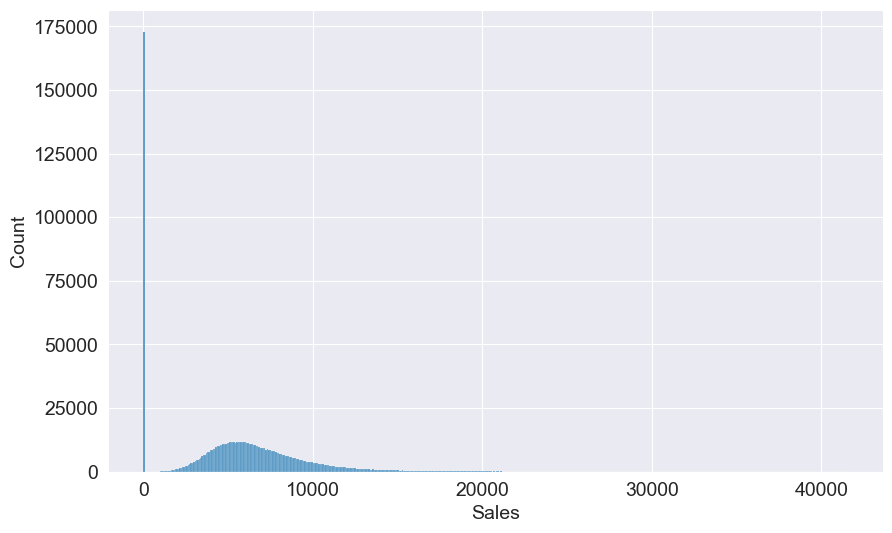

In [30]:
sns.histplot(data = merged_df, x = "Sales")
plt.show()

In [31]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [32]:
merged_df.Sales.value_counts()[0]

172871

In [34]:
merged_df = merged_df[merged_df["Open"] == 1].copy()

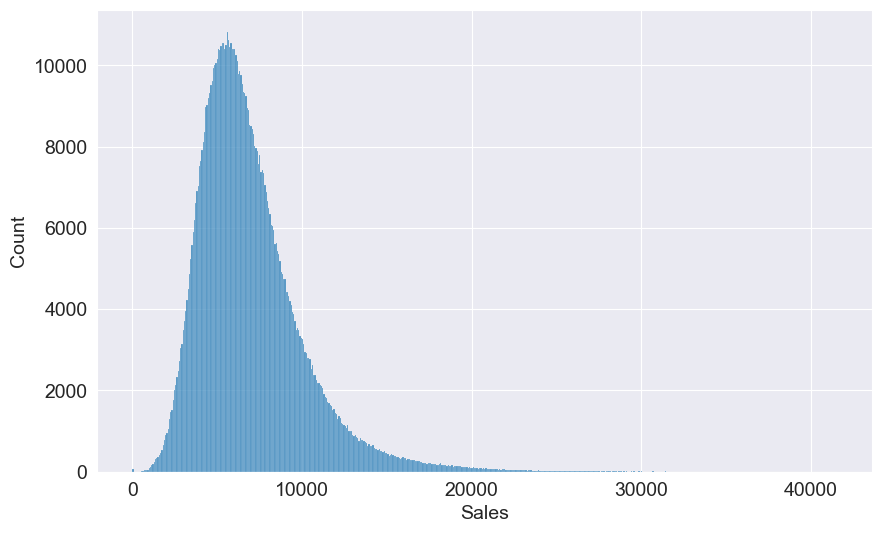

In [37]:
sns.histplot(data = merged_df, x = "Sales")
plt.show()

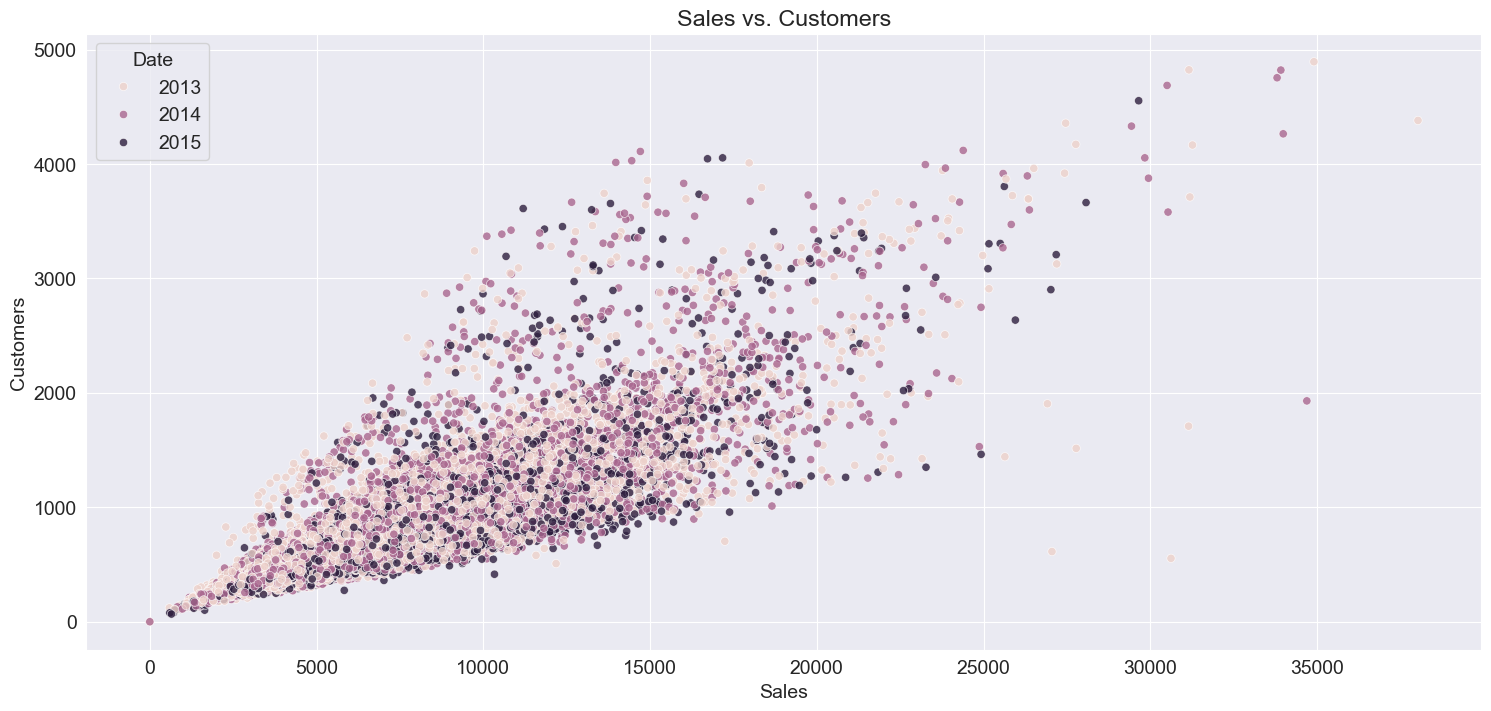

In [39]:
plt.figure(figsize=(18, 8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x = temp_df.Sales, y = temp_df.Customers, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title("Sales vs. Customers")
plt.show()

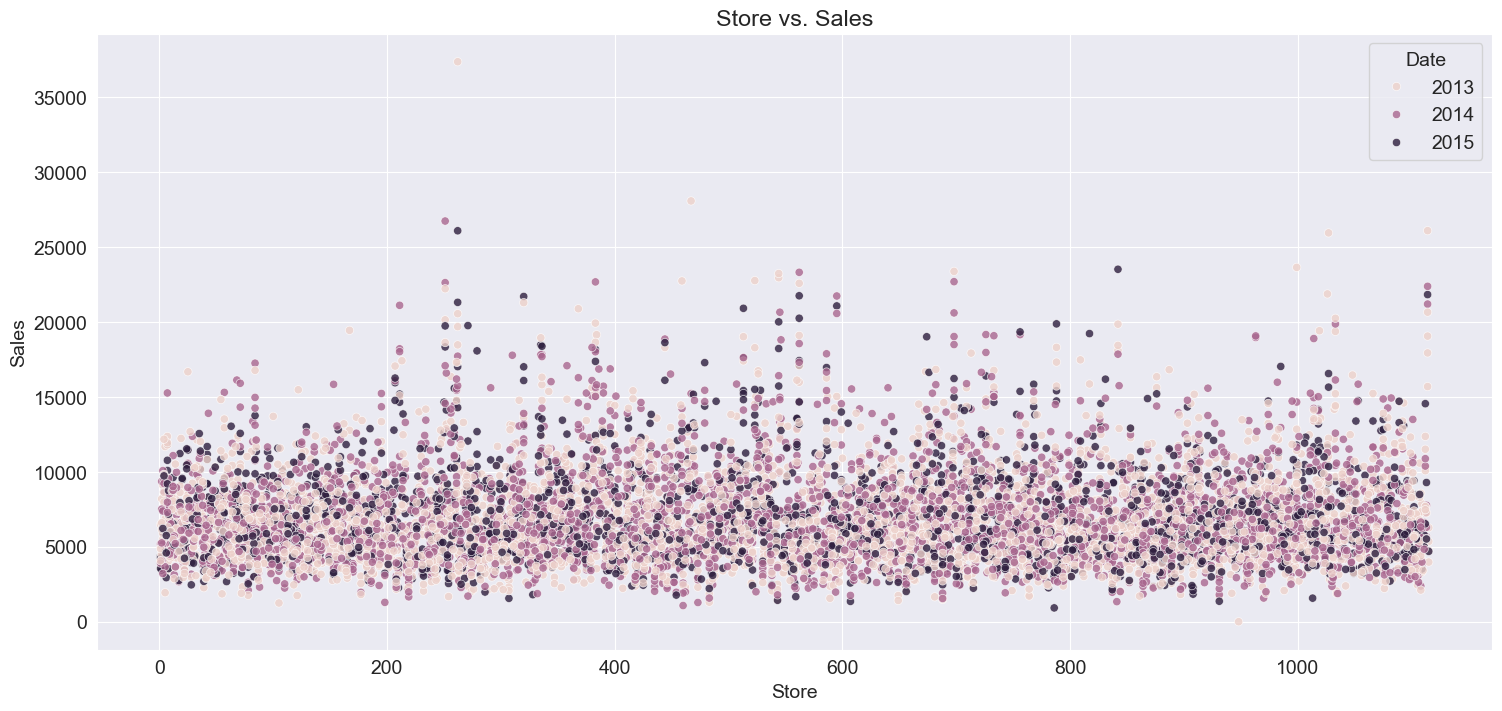

In [40]:
plt.figure(figsize = (18, 8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x = temp_df.Store, y = temp_df.Sales, hue = temp_df.Date.dt.year, alpha = 0.8)
plt.title("Store vs. Sales")
plt.show()

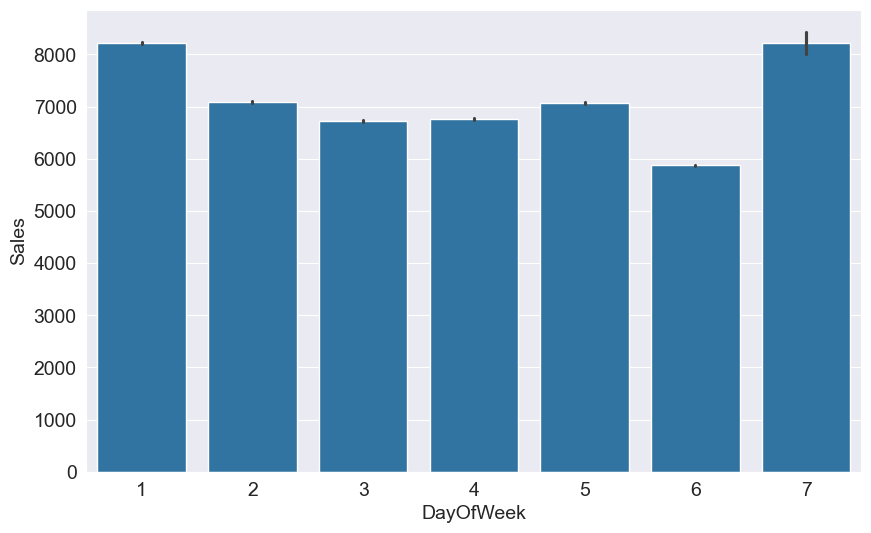

In [41]:
sns.barplot(data = merged_df, x = "DayOfWeek", y = "Sales")
plt.show()

<Axes: xlabel='Promo', ylabel='Sales'>

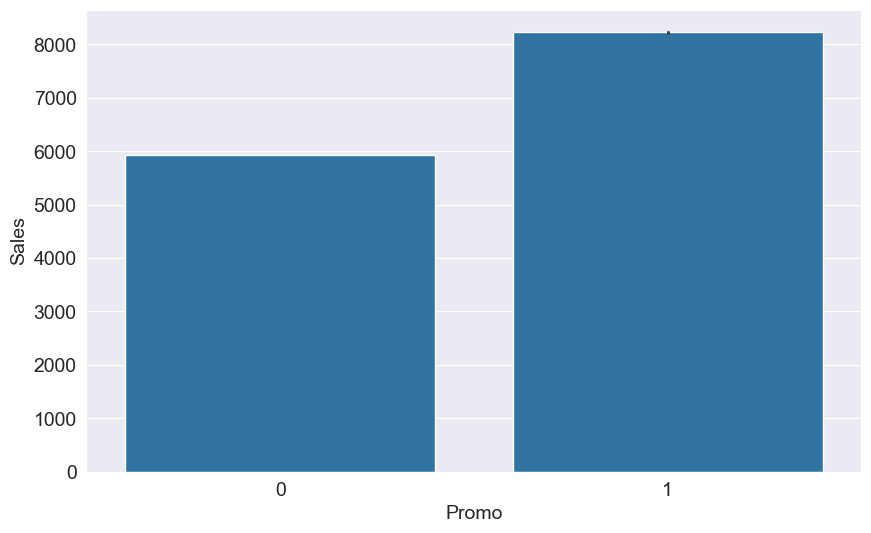

In [42]:
sns.barplot(data = merged_df, x = "Promo", y = "Sales")
plt.show()

In [44]:
num_cols = merged_df.select_dtypes(include = ['number']).columns.tolist()

In [45]:
merged_df[num_cols].corr()["Sales"].sort_values(ascending = False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

#### Feature Engineering

Feature Engineering is the process of creating new features (columns) by transforming/combining features or by incorporating data from external sources.

For example, here are somefeatures that can be extracted from the "Date" column.
1. Day of the week
2. Day or month
3. Month
4. Year
5. Weekend or Weekday
6. Month/Quarter End

In [46]:
merged_df["Day"] = merged_df.Date.dt.day
merged_df["Month"] = merged_df.Date.dt.month
merged_df["Year"] = merged_df.Date.dt.year

In [47]:
merged_test_df["Day"] = merged_test_df.Date.dt.day
merged_test_df["Month"] = merged_test_df.Date.dt.month
merged_test_df["Year"] = merged_test_df.Date.dt.year

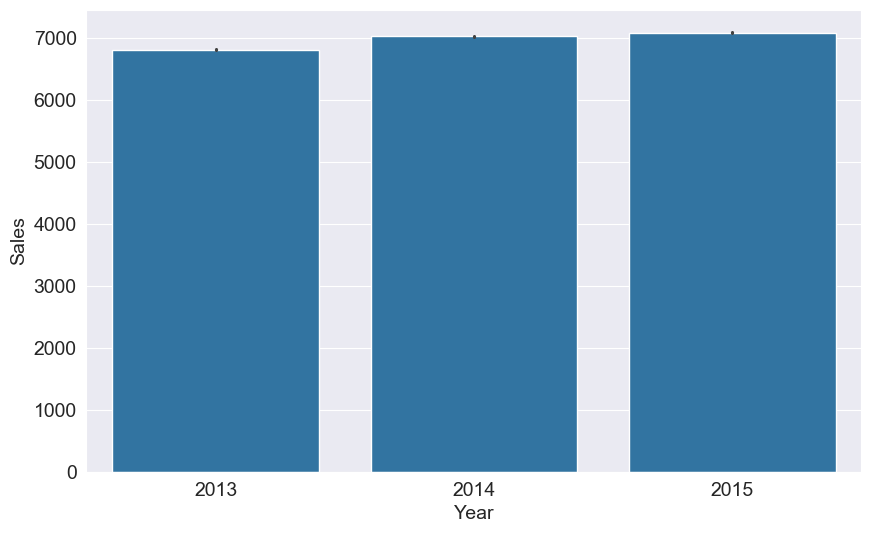

In [49]:
sns.barplot(data = merged_df, x = "Year", y = "Sales")
plt.show()

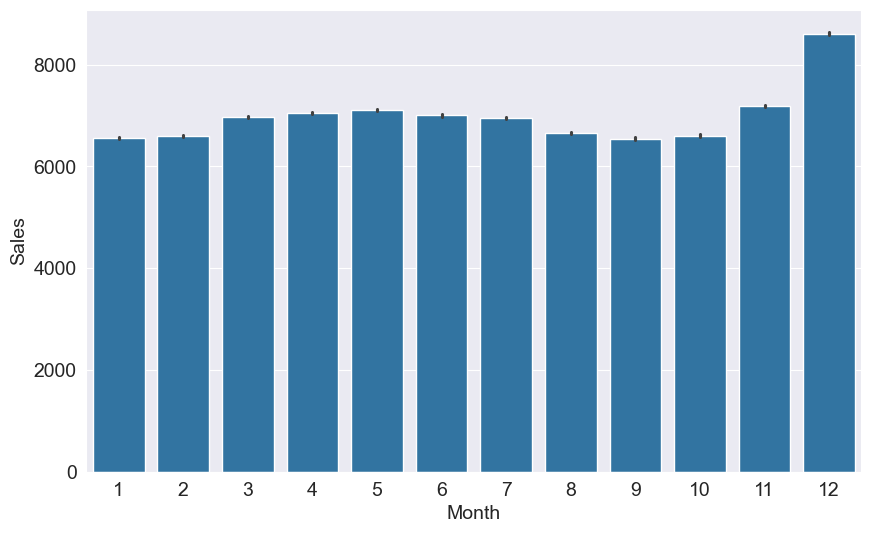

In [51]:
sns.barplot(data = merged_df, x = "Month", y = "Sales")
plt.show()

### Step 4 - Create a training/validation/test split and prepare the data for training

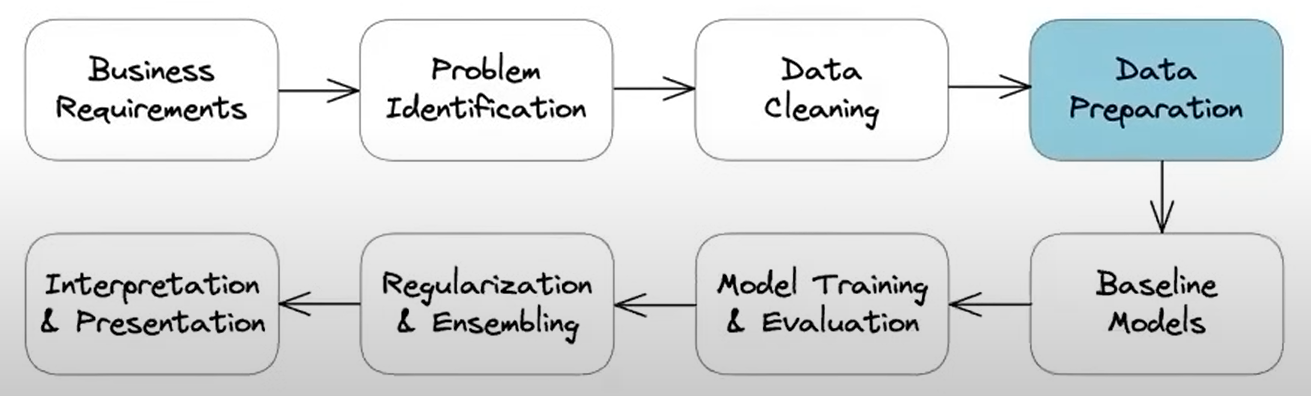

#### Train/Validation/Test

The Data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similr strategy to create a validation set. We'll the last 25% of rows for the validation set, after the ordering by date.

In [52]:
len(merged_df)

844392

In [53]:
train_size = int(.75 * len(merged_df))
train_size

633294

In [54]:
sorted_df = merged_df.sort_values("Date")
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [55]:
train_df.shape, val_df.shape

((633294, 21), (211098, 21))

In [57]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [58]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [59]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [60]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

#### Input and Target Columns

In [61]:
input_cols = ["Store", "DayOfWeek", "Promo",
              "StateHoliday", "StoreType", "Assortment",
              "Day", "Month", "Year"]

In [62]:
target_col = "Sales"

In [63]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [64]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

In [65]:
val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

In [66]:
test_inputs = merged_test_df[input_cols].copy()

In [67]:
numerical_cols = ["Store", "Day", "Month", "Year"]
cat_cols = ["DayOfWeek", "Promo",
            "StateHoliday", "StoreType", "Assortment"]

#### imputation, Scaling and Encoding

In [68]:
from sklearn.impute import SimpleImputer

In [69]:
imputer = SimpleImputer(strategy = "mean").fit(train_inputs[numerical_cols])

In [70]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler().fit(train_inputs[numerical_cols])

In [73]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [74]:
from sklearn.preprocessing import OneHotEncoder

In [76]:
encoder = OneHotEncoder(sparse_output = False, handle_unknown = "ignore").fit(train_inputs[cat_cols])
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [79]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[cat_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[cat_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[cat_cols])

In [80]:
X_train = train_inputs[numerical_cols + encoded_cols]
X_val = val_inputs[numerical_cols + encoded_cols]
X_test = test_inputs[numerical_cols + encoded_cols]

In [81]:
X_train.head()

Store  Day  Month  Year  DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  \
1017190  0.983842  0.0    0.0   0.0          0.0          1.0          0.0   
1016179  0.075404  0.0    0.0   0.0          0.0          1.0          0.0   
1016353  0.231598  0.0    0.0   0.0          0.0          1.0          0.0   
1016356  0.234291  0.0    0.0   0.0          0.0          1.0          0.0   
1016368  0.245063  0.0    0.0   0.0          0.0          1.0          0.0   

         DayOfWeek_4  DayOfWeek_5  DayOfWeek_6  ...  StateHoliday_a  \
1017190          0.0          0.0          0.0  ...             1.0   
1016179          0.0          0.0          0.0  ...             1.0   
1016353          0.0          0.0          0.0  ...             1.0   
1016356          0.0          0.0          0.0  ...             1.0   
1016368          0.0          0.0          0.0  ...             1.0   

         StateHoliday_b  StateHoliday_c  StoreType_a  StoreType_b  \
1017190             0.0             0.0          0.0          1.0   
1016179             0.0             0.0          0.0          1.0   
1016353             0.0             0.0          0.0          1.0   
1016356             0.0             0.0          0.0          1.0   
1016368             0.0             0.0          0.0          1.0   

         StoreType_c  StoreType_d  Assortment_a  Assortment_b  Assortment_c  
1017190          0.0          0.0           0.0           1.0           0.0  
1016179          0.0          0.0           1.0           0.0           0.0  
1016353          0.0          0.0           0.0           1.0           0.0  
1016356          0.0          0.0           1.0           0.0           0.0  
1016368          0.0          0.0           0.0           1.0           0.0  

[5 rows x 24 columns]

In [83]:
X_train.shape, X_val.shape, X_test.shape

((633294, 24), (211098, 24), (41088, 24))

### Step 5 - Baseline Model

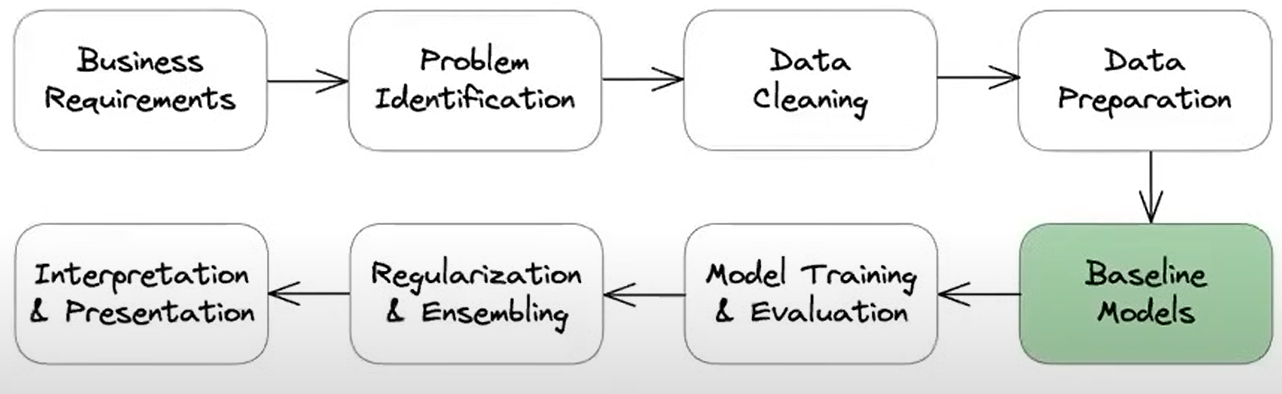

#### Fixed/Random Guess

In [84]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [85]:
train_preds = return_mean(X_train)

In [86]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

RMSE for return_mean

In [90]:
from sklearn.metrics import root_mean_squared_error

In [92]:
root_mean_squared_error(train_preds, train_target)

3082.450443277419

In [93]:
root_mean_squared_error(return_mean(X_val), val_target)

3168.6033635047716

In [102]:
def guess_random(inputs):
    lo, hi = 3000, 8000
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [103]:
train_preds = guess_random(X_train)

In [104]:
train_preds

array([3233.07596588, 7008.66245801, 3196.45022418, ..., 6590.84782947,
       7272.9552888 , 6193.64157036])

In [105]:
root_mean_squared_error(train_preds, train_target)

3669.739113108867

In [106]:
root_mean_squared_error(guess_random(X_val), val_target)

3864.811385107063

#### Baseline ML model

In [107]:
from sklearn.linear_model import LinearRegression

In [108]:
lr = LinearRegression()

In [109]:
lr.fit(X_train, train_target)

LinearRegression()

In [111]:
train_preds = lr.predict(X_train)

In [112]:
root_mean_squared_error(train_target, train_preds)

2741.592532619505

In [113]:
val_preds = lr.predict(X_val)
root_mean_squared_error(val_target, val_preds)

2817.708757533306

### Step 6 - Pick a strategy, train a model and Hyper parameter tuning

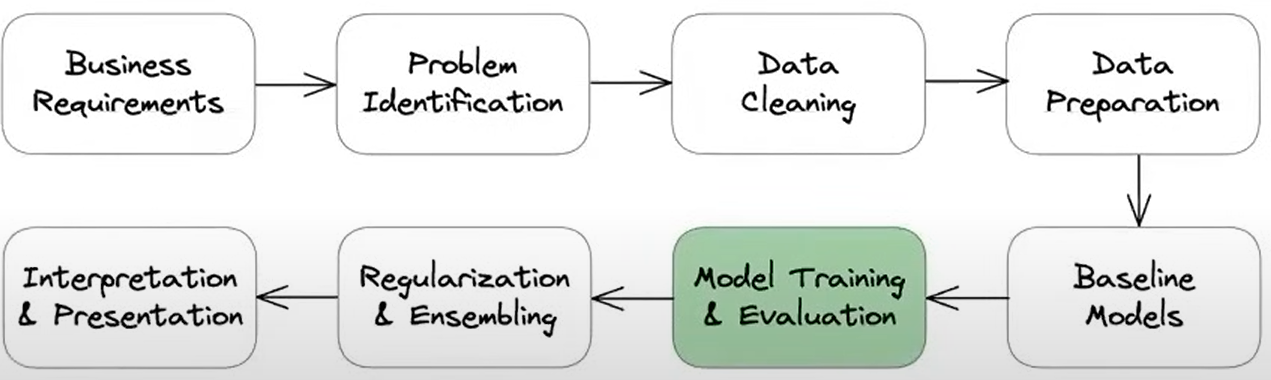

#### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

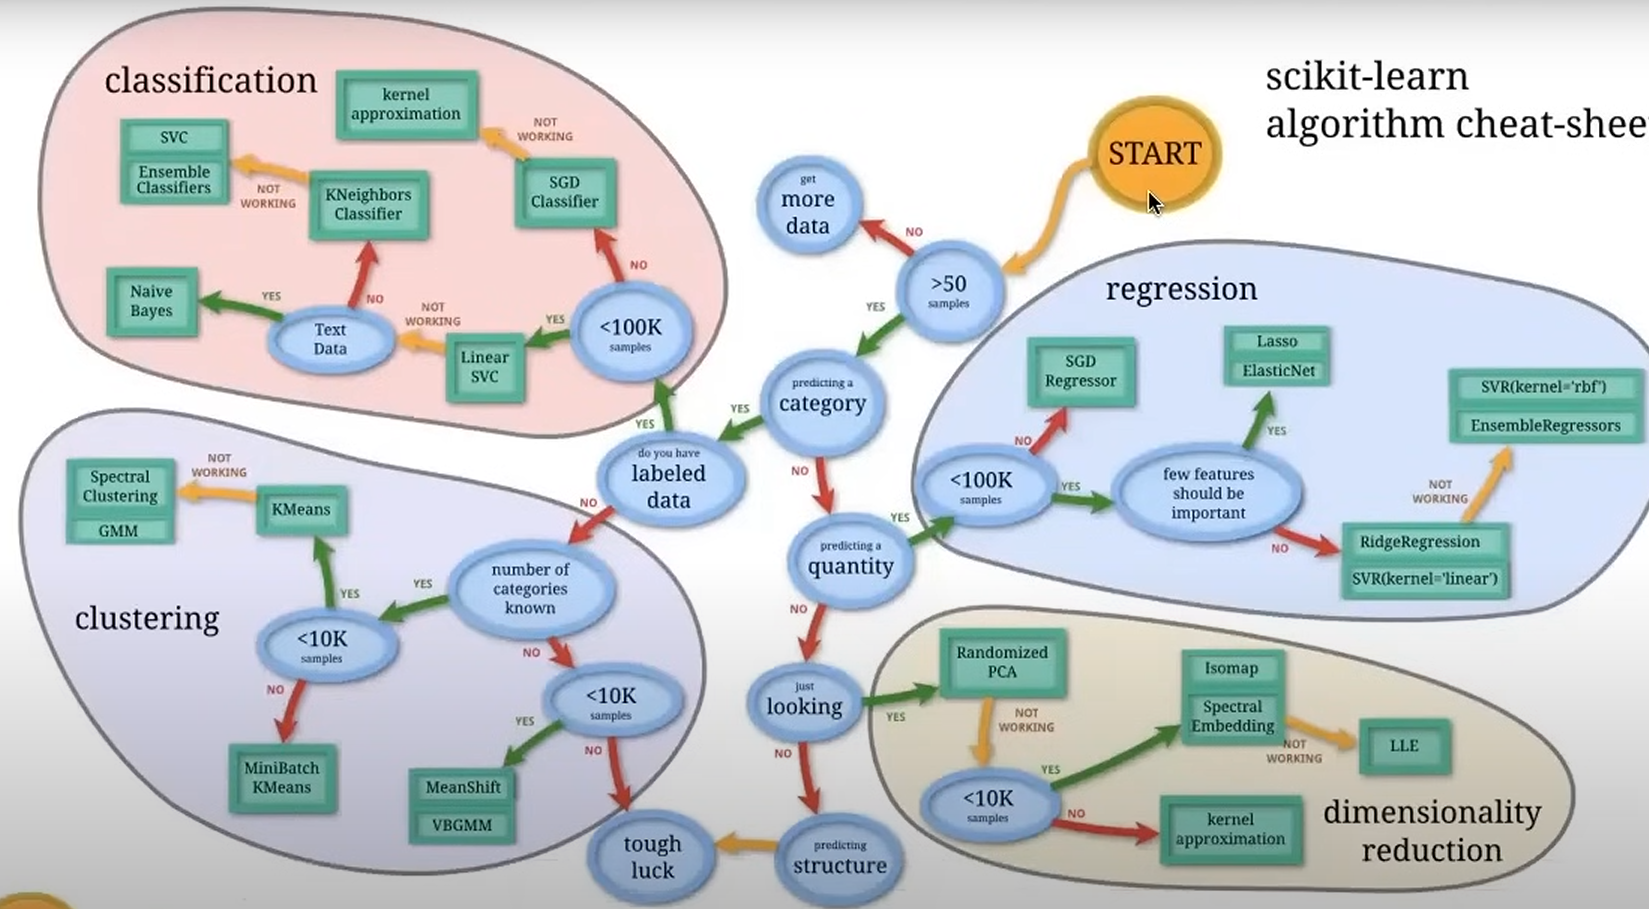

In [114]:
def try_model(model):

    # Fit the model
    model.fit(X_train, train_target)

    # Generate Predictions
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)

    # Compute RMSE
    train_rmse = root_mean_squared_error(train_target, train_preds)
    val_rmse = root_mean_squared_error(val_target, val_preds)

    return train_rmse, val_rmse

##### Liinear Models

In [115]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor

In [116]:
try_model(LinearRegression())

(2741.592532619505, 2817.708757533306)

In [117]:
try_model(Ridge())

(2741.587195081445, 2817.7784665409863)

In [118]:
try_model(Lasso())

(2741.7143904640566, 2817.9472924045217)

In [122]:
try_model(ElasticNet(alpha = 0.6))

(2843.658589679247, 2935.862100049394)

In [121]:
try_model(SGDRegressor())

(2742.1463575657035, 2815.4390605379017)

##### Tree based models

In [123]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [124]:
tree = DecisionTreeRegressor(random_state = 42)
try_model(tree)

(0.0, 1559.7378600480247)

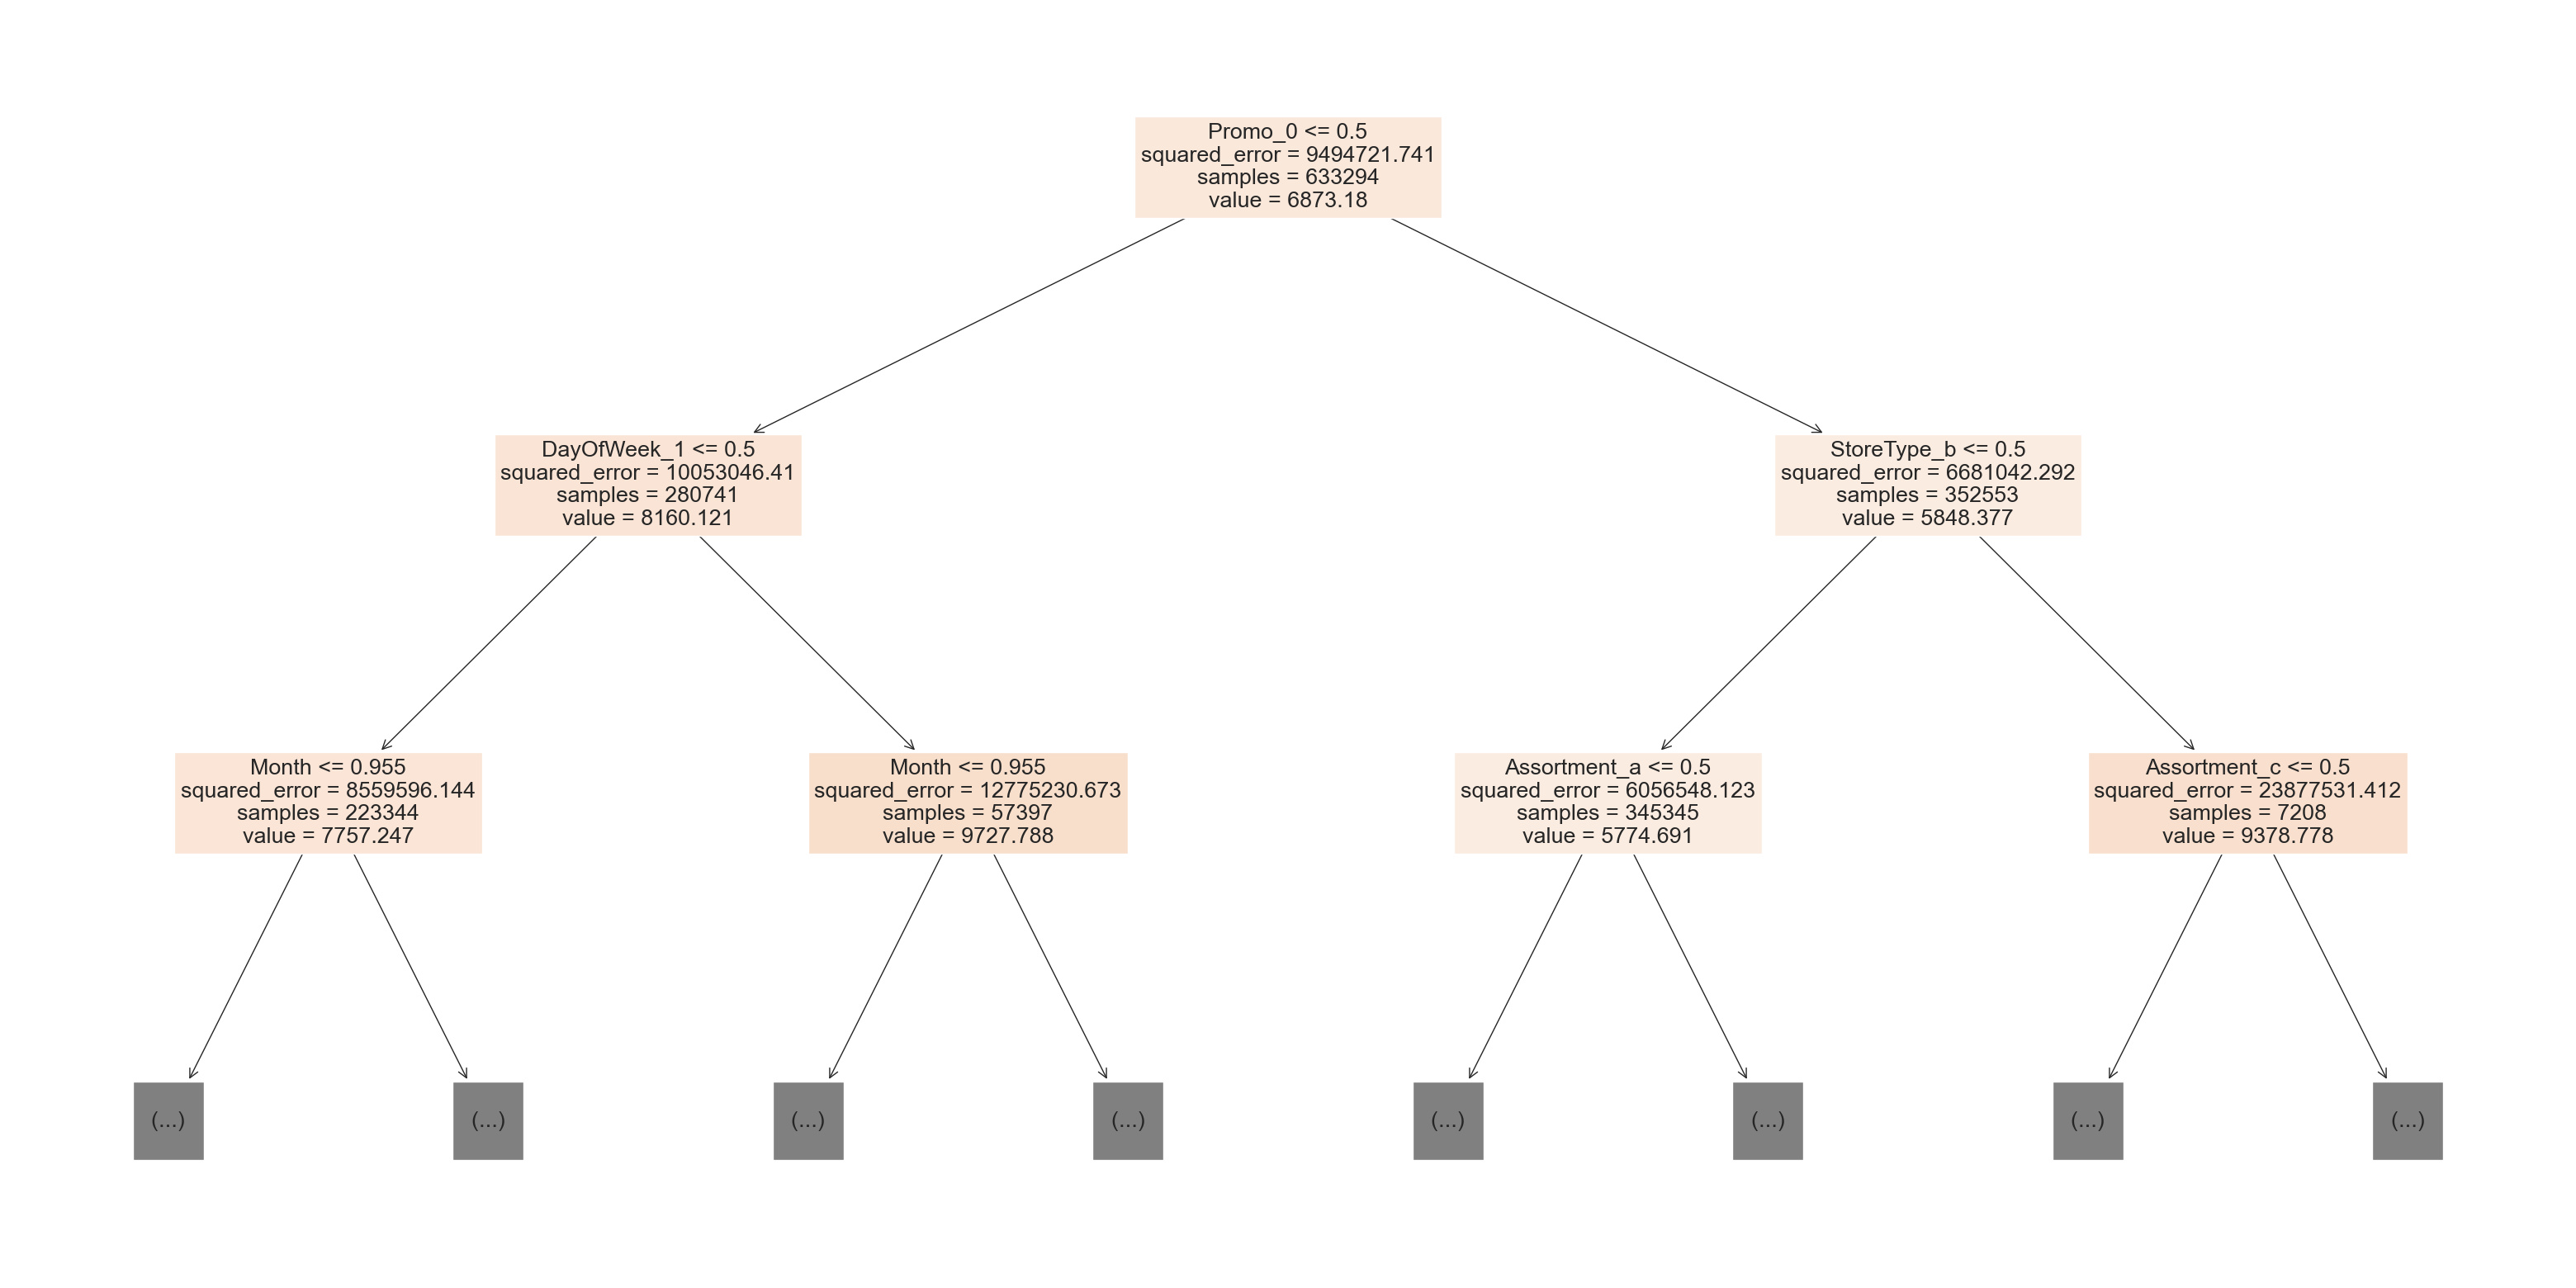

In [127]:
plt.figure(figsize = (40, 20))
plot_tree(tree, max_depth = 2, filled = True, feature_names = numerical_cols+encoded_cols)
plt.show()

In [128]:
from sklearn.ensemble import RandomForestRegressor

In [129]:
rf = RandomForestRegressor(random_state = 42, n_jobs = -1)
try_model(rf)

(474.9198974666898, 1371.7321923469985)

### Step 7 - Experiment and combine results from multiple strategies

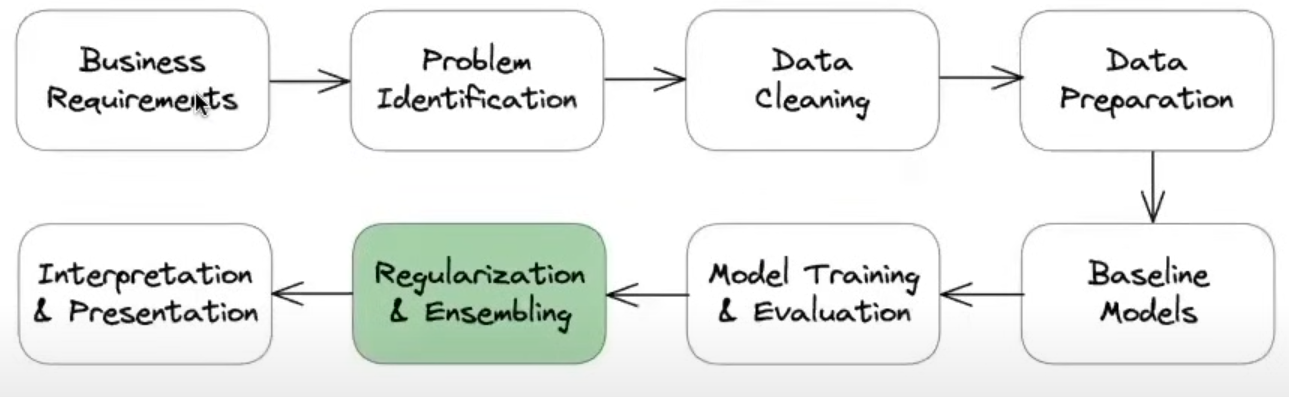

In general, the following strategies can be used to improve the performance of a model:
- Gather more data
- Include more features
- Tune the hyper parameters
- Try different strategies like Grid Search and K-cross validation

We can try out many options like -
- Ensembling -> Here 3-4 different type of models are taken and then we take the average or weighted average of their predictions.
- Stacking -> Here 3-4 different type of models are taken and take their outputs as input for another model.

### Step 8 - Interpret models, study individual predictions and present your findings

In [130]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [131]:
importance_df = pd.DataFrame({
    "feature": numerical_cols+encoded_cols,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending = False)

In [132]:
importance_df.head()

feature  importance
0     Store    0.607412
12  Promo_1    0.080520
11  Promo_0    0.058347
1       Day    0.048839
2     Month    0.047125

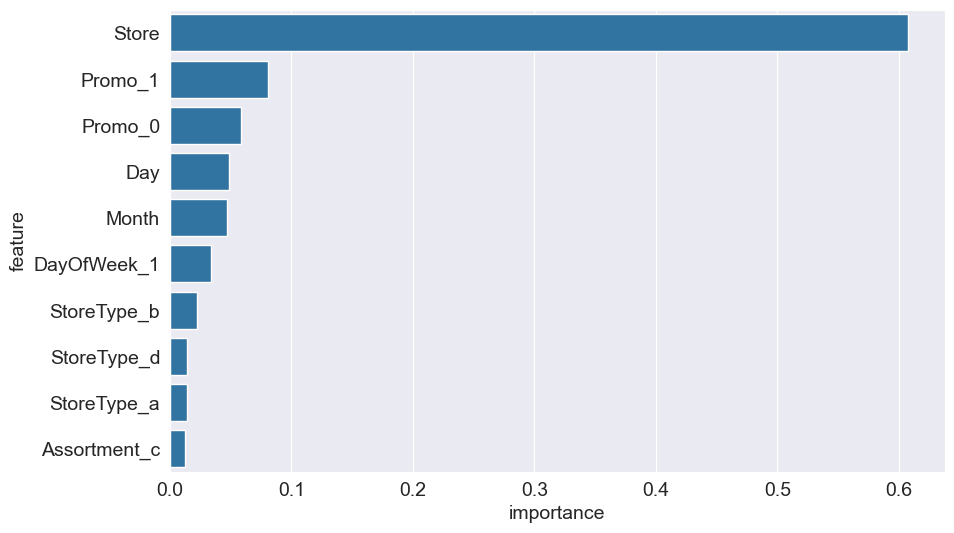

In [133]:
sns.barplot(data = importance_df.head(10), x = "importance", y = "feature")
plt.show()

#### Looking at a single prediction

In [143]:
def predict_output(model, single_input):
    if single_input["Open"] == 0:
        return 0
    input_df = pd.DataFrame([single_input])
    input_df["Date"] = pd.to_datetime(input_df.Date)
    input_df["Day"] = input_df.Date.dt.day
    input_df["Month"] = input_df.Date.dt.month
    input_df["Year"] = input_df.Date.dt.year
    input_df[numerical_cols] = imputer.transform(input_df[numerical_cols])
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    input_df[encoded_cols] = encoder.transform(input_df[cat_cols])
    X_inputs = input_df[numerical_cols + encoded_cols]
    pred = model.predict(X_inputs)[0]
    return pred

In [144]:
sample_input = {
    "ID": 1,
    "Store": 1,
    "DayOfWeek": 4,
    "Date": "2015-09-17 00:00:00",
    "Open": 1.0,
    "Promo": 0,
    "StateHoliday": "0",
    "SchoolHoliday": 0,
    "StoreType": "c",
    "Assortment": "a",
    "CompetitionDistance": 1270.0,
    "CompetitionOpenSinceMonth": 9.0,
    "CompetitionOpenSinceYear": 2008.0,
    "Promo2": 0,
    "Promo2SinceWeek": np.nan,
    "Promo2SinceYear": np.nan,
    "PromoInterval": np.nan
}

In [145]:
sample_input

{'ID': 1,
 'Store': 1,
 'DayOfWeek': 4,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 0,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [146]:
predict_output(rf, sample_input)

3500.55